# 简单线性回归（梯度下降法）

### 0. 引入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 导入数据（data.csv）

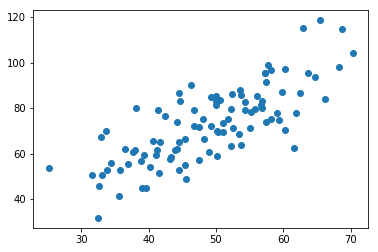

In [2]:
points = np.genfromtxt('data.csv', delimiter=',')

points[0,0]

# 提取points中的两列数据，分别作为x，y
x = points[:, 0]
y = points[:, 1]

# 用plt画出散点图
plt.scatter(x, y)
plt.show()

### 2. 定义损失函数

In [3]:
# 损失函数是系数的函数，另外还要传入数据的x，y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y - w * x - b ) ** 2
    
    return total_cost/M

### 3. 定义模型的超参数

In [4]:
alpha = 0.0001
initial_w = 0
initial_b = 0
num_iter = 10

### 4. 定义核心梯度下降算法函数

In [5]:
def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    # 定义一个list保存所有的损失函数值，用来显示下降的过程
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append( compute_cost(w, b, points) )
        w, b = step_grad_desc( w, b, alpha, points )
    
    return [w, b, cost_list]

def step_grad_desc( current_w, current_b, alpha, points ):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    # 对每个点，代入公式求和
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += ( current_w * x + current_b - y ) * x
        sum_grad_b += current_w * x + current_b - y
    
    # 用公式求当前梯度
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    # 梯度下降，更新当前的w和b
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b
    
    return updated_w, updated_b

### 5. 测试：运行梯度下降算法计算最优的w和b

w is:  1.47741737555
b is:  0.0296393478747
cost is:  112.655851815


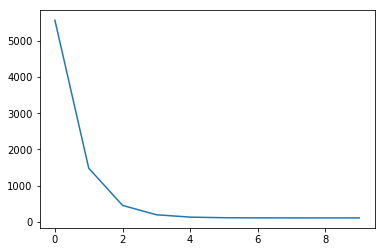

In [6]:
w, b, cost_list = grad_desc( points, initial_w, initial_b, alpha, num_iter )

print("w is: ", w)
print("b is: ", b)

cost = compute_cost(w, b, points)

print("cost is: ", cost)

plt.plot(cost_list)
plt.show()

### 6. 画出拟合曲线

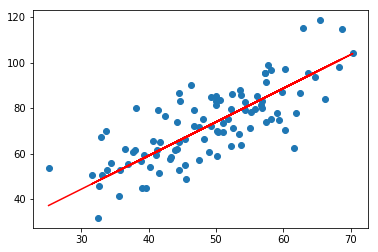

In [7]:
plt.scatter(x, y)
# 针对每一个x，计算出预测的y值
pred_y = w * x + b

plt.plot(x, pred_y, c='r')
plt.show()